# PREDICTED WORD

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

## Mengambil File 

In [2]:
file_location = r'C:\Users\muhammadalfarizi\Documents\MyNotebook\NLP\BigData\irish-lyrics-eof.txt'
with open(file_location, 'r') as file:
    for line in file:
        print(line)

Come all ye maidens young and fair

And you that are blooming in your prime

Always beware and keep your garden fair

Let no man steal away your thyme

For thyme it is a precious thing

And thyme brings all things to my mind

nlyme with all its flavours, along with all its joys

Thyme, brings all things to my mind

Once I and a bunch of thyme

i thought it never would decay

Then came a lusty sailor

Who chanced to pass my way

And stole my bunch of thyme away

The sailor gave to me a rose

A rose that never would decay

He gave it to me to keep me reminded

Of when he stole my thyme away

Sleep, my child, and peace attend thee

All through the night

Guardian angels God will send thee

Soft the drowsy hours are creeping

Hill and dale in slumber sleeping

I my loving vigil keeping

While the moon her watch is keeping

While the weary world is sleeping

Oer thy spirit gently stealing

Visions of delight revealing

Breathes a pure and holy feeling

Though I roam a minstrel lonely

My tr

## Membagi file menjadi himpunan kalimat

In [3]:
with open(file_location, 'r') as file:
    readfile = file.read()
    himp_kalimat = readfile.lower().split("\n")

## Tokenisasi

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(himp_kalimat)
word_index = tokenizer.word_index

print("Banyak Word Index = {} index".format(len(word_index)))
total_words = len(word_index) + 1

Banyak Word Index = 2689 index


In [5]:
input_sequence = []

for kalimat in himp_kalimat:
    token_list = tokenizer.texts_to_sequences([kalimat])
    # didalem texts_to_sequence parameter nya pake [] lagi buat negesin kalo setiap kata dari kalimat itu adalah elemen list
    
## coba uncomment ini buat liat debug
#     print("Kalimat = {}, Token = {}".format(kalimat, token_list))
#     print(token_list)
#     print(token_list[0])
#     print()

    # jadi hasil dari texts_to_sequence adalah list yang isinya cuma 1 anaklist dimana anak list itu punya elemen elemen berupa kata kata dari kalimat
    # makanya perlu diambil anaklist dari list tersebut. karna anaknya cuma 1, manggil anaknya tinggal pake index 0 aja
    token_list = token_list[0]
#     print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
#         print(n_gram_sequence)
        input_sequence.append(n_gram_sequence)
#     print()
    
max_sequence_length = max([len(x) for x in input_sequence])
print("Maximal Length of Sentences = {} Word".format(max_sequence_length))

Maximal Length of Sentences = 16 Word


## Padding

In [6]:
input_sequence = np.array(
    pad_sequences(
        input_sequence,
        maxlen = max_sequence_length,
        padding = 'pre'
    )
)

## Misahin Kalimat

kalimat akan dipisah menjadi data training dan label

misal kalimat [1, 2, 3, 4, 5, 6]

maka akan dipisah menjadi data training = [1, 2, 3, 4, 5]

dan label =[6]


kemudian label akan diubah menjadi kategorikal misal ada 10 kata

maka label [6] akan berubah jadi [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [7]:
xs = input_sequence[:, :-1]
labels = input_sequence[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

## Build Neural Network

In [8]:
EMBEDDING_DIM = 100
OPTIMIZER = Adam(lr = 0.01)
EPOCH = 50

In [9]:
model = Sequential()
model.add(
    Embedding(
        total_words,
        EMBEDDING_DIM,
        input_length = max_sequence_length-1, # dikurang 1 karena 1 nya adalah label
    )
)
model.add(
    Bidirectional(
        LSTM(
            150
        )
    )
)
model.add(
    Dense(
        total_words,
        activation = 'softmax'
    )
)

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = OPTIMIZER
)

model.summary()
print(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(
    xs,
    ys,
    epochs = EPOCH
)

Epoch 1/50
377/377 [==============================] - 30s 68ms/step - loss: 6.8836 - accuracy: 0.0587
Epoch 2/50
377/377 [==============================] - 26s 68ms/step - loss: 5.8527 - accuracy: 0.1016
Epoch 3/50
377/377 [==============================] - 26s 68ms/step - loss: 4.8249 - accuracy: 0.1719
Epoch 4/50
377/377 [==============================] - 26s 68ms/step - loss: 3.9089 - accuracy: 0.2499
Epoch 5/50
377/377 [==============================] - 27s 71ms/step - loss: 3.0550 - accuracy: 0.3599
Epoch 6/50
377/377 [==============================] - 26s 68ms/step - loss: 2.4107 - accuracy: 0.4571
Epoch 7/50
377/377 [==============================] - 26s 69ms/step - loss: 1.8985 - accuracy: 0.5649
Epoch 8/50
377/377 [==============================] - 26s 68ms/step - loss: 1.6156 - accuracy: 0.6248
Epoch 9/50
377/377 [==============================] - 26s 68ms/step - loss: 1.3988 - accuracy: 0.6620
Epoch 10/50
377/377 [==============================] - 26s 69ms/step - loss: 1.189

In [14]:
def drawGraph(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string])
    plt.title('NLP with Adam LR = 0.001')
    plt.show()

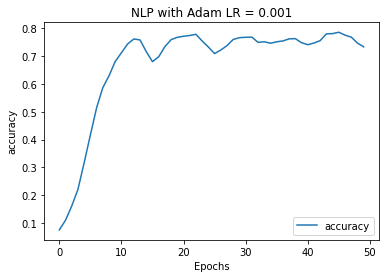

In [15]:
drawGraph(history, 'accuracy')

In [24]:
contoh_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([contoh_text])[0]
    token_list = pad_sequences(
        [token_list],
        maxlen = max_sequence_length-1,
        padding = 'pre'
    )
    predicted = model.predict_classes(
        token_list,
        verbose = 0
    )
    
    output = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output = word
            break
            
    contoh_text += " " + output
        
print(contoh_text)

c:\users\muhammadalfarizi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this green and the girls they were hearty wind my love is gone and love eyes worsened eyes gone is right gone is right eyes gone is sighing gone gone gone gone is an tree to tree me tree to tree to tree wid me lads know by gone and gone is an youth gone gone gone and i love best gone and a fixed played right leg through miss finnertys hoops right bride hear your right eyes more right till gone is right leg right mchugh gone and the love eyes doesnt eyes eyes all right right till more right
